In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader

import numpy as np 
import pathlib

# Importing utitility functions for training
from PT_files.model import DnCNN, DnCNN_B
from PT_files.Dataset import Img_Dataset, Large_Img_Dataset
import PT_files.preprocess_data as ppd
import PT_files.save_load as sl
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"

Using cuda device


In [2]:
two_k_SGD_t_loss = sl.NERSC_load('2k_train_SGD_loss_800epochs_bs64.npy')
two_k_SGD_t_loss = np.log(two_k_SGD_t_loss)
two_k_SGD_v_loss = sl.NERSC_load('2k_val_SGD_loss_800epochs_bs64.npy')
two_k_SGD_v_loss = np.log(two_k_SGD_v_loss)


two_k_adam_t_loss = sl.NERSC_load('2k_train_Adam_loss_800epochs_bs64.npy')
two_k_adam_t_loss = np.log(two_k_adam_t_loss)
two_k_adam_v_loss = sl.NERSC_load('2k_val_Adam_loss_800epochs_bs64.npy')
two_k_adam_v_loss = np.log(two_k_adam_v_loss)


six_k_SGD_t_loss = sl.NERSC_load('6k_train_SGD_loss_800epochs_bs16.npy')
six_k_SGD_t_loss = np.log(six_k_SGD_t_loss)
six_k_SGD_v_loss = sl.NERSC_load('6k_val_SGD_loss_800epochs_bs16.npy')
six_k_SGD_v_loss = np.log(six_k_SGD_v_loss)


six_k_adam_t_loss = sl.NERSC_load('6k_train_adam_loss_800epochs_bs16.npy')
six_k_adam_t_loss = np.log(six_k_adam_t_loss)
six_k_adam_v_loss = sl.NERSC_load('6k_val_adam_loss_800epochs_bs16.npy')
six_k_adam_v_loss = np.log(six_k_adam_v_loss)


sl.NERSC_load('lys20_48feat_tloss.npy')

In [ ]:
sl.NERSC_save('6k_WB_train_loss_20lys_48feat_1200e', losses)
sl.NERSC_save('6k_WB_val_loss_20lys_48feat_1200e', val_losses)

In [ ]:
sl.NERSC_load('6k_WB_train_loss_20lys_48feat.npy')


In [5]:
best_t = sl.NERSC_load('6k_WB_train_loss.npy')
best_v = sl.NERSC_load('6k_WB_val_loss.npy')

WB_2048_t = sl.NERSC_load('6k_WB_train_loss_20lys_48feat.npy')
WB_2048_v = sl.NERSC_load('6k_WB_val_loss_10lys_48feat.npy')


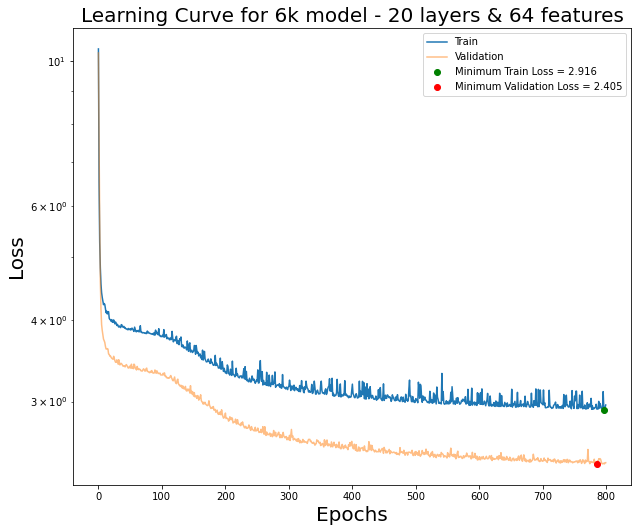

In [7]:
plt.figure(figsize=(10,8.4));
plt.title("Learning Curve for 6k model - 20 layers & 64 features", size=20);
plt.plot(range(800), np.asarray(best_t), label="Train");
plt.plot(range(800), np.asarray(best_v), label="Validation", alpha=0.5);
plt.plot(np.argmin(best_t), np.asarray(best_t[np.argmin(best_t)]), 'go', label='Minimum Train Loss = ' f'{best_t[np.argmin(best_t)]:.3f}')
plt.plot(np.argmin(best_v), np.asarray(best_v[np.argmin(best_v)]), 'ro', label='Minimum Validation Loss = ' f'{best_v[np.argmin(best_v)]:.3f}')
plt.xlabel("Epochs", size=20);
plt.ylabel("Loss", size=20);
plt.yscale('log')
# plt.ylim(0,100);
plt.legend(fontsize=10);
plt.show();

In [ ]:
plt.figure(figsize=(10,8.4));
plt.title("Learning Curve for 6k model - 20 layers & 48 features", size=20);
plt.plot(range(1200), np.asarray(losses), label="Train");
plt.plot(range(1200), np.asarray(val_losses), label="Validation", alpha=0.5);
plt.plot(np.argmin(losses), np.asarray(losses[np.argmin(losses)]), 'go', label='Minimum Train Loss = ' f'{losses[np.argmin(losses)]:.3f}')
plt.plot(np.argmin(val_losses), np.asarray(val_losses[np.argmin(val_losses)]), 'ro', label='Minimum Validation Loss = ' f'{val_losses[np.argmin(val_losses)]:.3f}')
plt.xlabel("Epochs", size=20);
plt.ylabel("Loss", size=20);
plt.yscale('log')
# plt.ylim(0,100);
plt.legend(fontsize=10);
plt.show();

In [7]:
# WB_6k_20 = sl.NERSC_load('6k_WB_e800_lys20_48feat.npy')
# WB_6k_17 = sl.NERSC_load('6k_WB_e800_lys17.npy')
# WB_6k_15 = sl.NERSC_load('6k_WB_e800_lys15.npy')
# WB_6k_12 = sl.NERSC_load('6k_WB_e800_lys12.npy')
# WB_6k_2052 = sl.NERSC_load('6k_WB_e800_lys20_52feat.npy')
# WB_6k_2058 = sl.NERSC_load('6k_WB_e800_lys20_58feat.npy')
# WB_6k_1952= sl.NERSC_load('6k_WB_e400_lys19_52feat.npy')

800

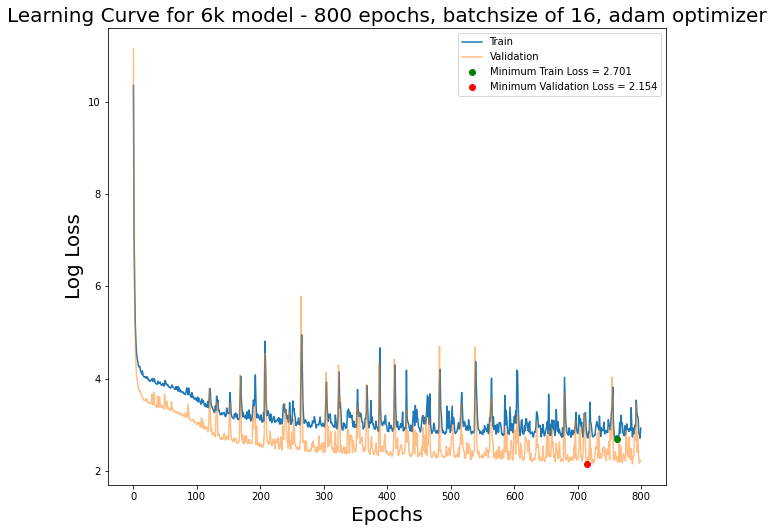

In [3]:
plt.figure(figsize=(10,8.4));
plt.title("Learning Curve for 6k model - 20 layers & 48 features", size=20);
plt.plot(range(1200), np.asarray(losses), label="Train");
plt.plot(range(1200), np.asarray(val_losses), label="Validation", alpha=0.5);
plt.plot(np.argmin(losses), np.asarray(losses[np.argmin(losses)]), 'go', label='Minimum Train Loss = ' f'{losses[np.argmin(losses)]:.3f}')
plt.plot(np.argmin(val_losses), np.asarray(val_losses[np.argmin(val_losses)]), 'ro', label='Minimum Validation Loss = ' f'{val_losses[np.argmin(val_losses)]:.3f}')
plt.xlabel("Epochs", size=20);
plt.ylabel("Loss", size=20);
plt.yscale('log')
# plt.ylim(0,100);
plt.legend(fontsize=10);
plt.show();

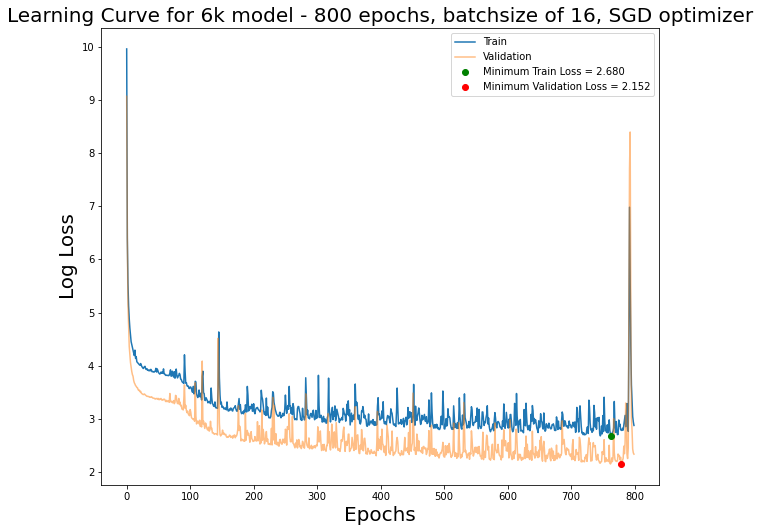

In [4]:
plt.figure(figsize=(10,8.4));
plt.title("Learning Curve for 6k model - 800 epochs, batchsize of 16, SGD optimizer", size=20);
plt.plot(range(800), np.asarray(six_k_SGD_t_loss), label="Train");
plt.plot(range(800), np.asarray(six_k_SGD_v_loss), label="Validation", alpha=0.5);
plt.plot(np.argmin(six_k_SGD_t_loss), np.asarray(six_k_SGD_t_loss[np.argmin(six_k_SGD_t_loss)]), 'go', label='Minimum Train Loss = ' f'{six_k_SGD_t_loss[np.argmin(six_k_SGD_t_loss)]:.3f}')
plt.plot(np.argmin(six_k_SGD_v_loss), np.asarray(six_k_SGD_v_loss[np.argmin(six_k_SGD_v_loss)]), 'ro', label='Minimum Validation Loss = ' f'{six_k_SGD_v_loss[np.argmin(six_k_SGD_v_loss)]:.3f}')
plt.xlabel("Epochs", size=20);
plt.ylabel("Log Loss", size=20);
# plt.ylim(0,100);
plt.legend(fontsize=10);
plt.show();

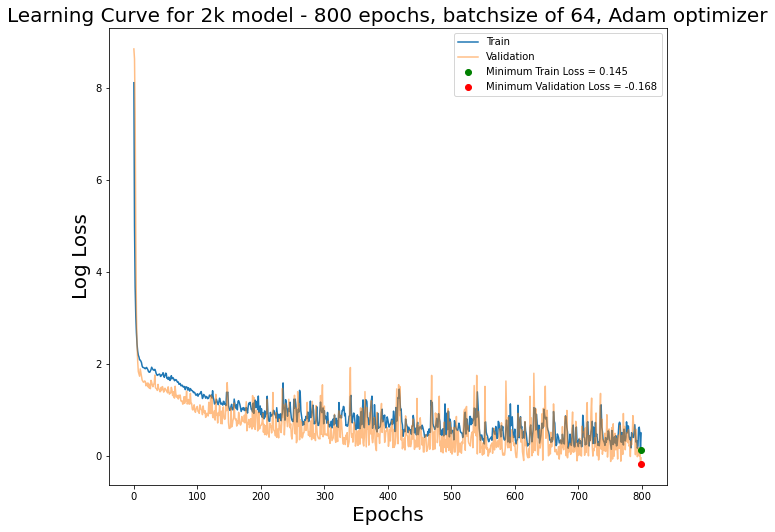

In [5]:
plt.figure(figsize=(10,8.4));
plt.title("Learning Curve for 2k model - 800 epochs, batchsize of 64, Adam optimizer", size=20);
plt.plot(range(800), np.asarray(two_k_adam_t_loss), label="Train");
plt.plot(range(800), np.asarray(two_k_adam_v_loss), label="Validation", alpha=0.5);
plt.plot(np.argmin(two_k_adam_t_loss), np.asarray(two_k_adam_t_loss[np.argmin(two_k_adam_t_loss)]), 'go', label='Minimum Train Loss = ' f'{two_k_adam_t_loss[np.argmin(two_k_adam_t_loss)]:.3f}')
plt.plot(np.argmin(two_k_adam_v_loss), np.asarray(two_k_adam_v_loss[np.argmin(two_k_adam_v_loss)]), 'ro', label='Minimum Validation Loss = ' f'{two_k_adam_v_loss[np.argmin(two_k_adam_v_loss)]:.3f}')
plt.xlabel("Epochs", size=20);
plt.ylabel("Log Loss", size=20);
# plt.ylim(0,100);
plt.legend(fontsize=10);
plt.show();

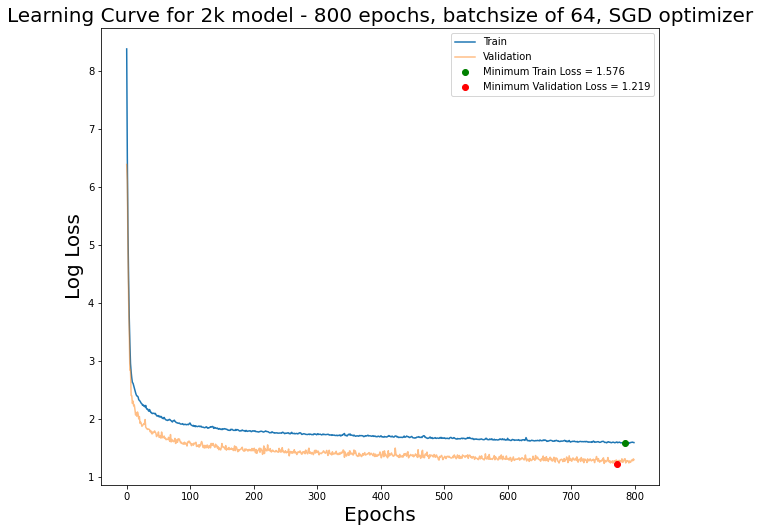

In [6]:
plt.figure(figsize=(10,8.4));
plt.title("Learning Curve for 2k model - 800 epochs, batchsize of 64, SGD optimizer", size=20);
plt.plot(range(800), np.asarray(two_k_SGD_t_loss), label="Train");
plt.plot(range(800), np.asarray(two_k_SGD_v_loss), label="Validation", alpha=0.5);
plt.plot(np.argmin(two_k_SGD_t_loss), np.asarray(two_k_SGD_t_loss[np.argmin(two_k_SGD_t_loss)]), 'go', label='Minimum Train Loss = ' f'{two_k_SGD_t_loss[np.argmin(two_k_SGD_t_loss)]:.3f}')
plt.plot(np.argmin(two_k_SGD_v_loss), np.asarray(two_k_SGD_v_loss[np.argmin(two_k_SGD_v_loss)]), 'ro', label='Minimum Validation Loss = ' f'{two_k_SGD_v_loss[np.argmin(two_k_SGD_v_loss)]:.3f}')
plt.xlabel("Epochs", size=20);
plt.ylabel("Log Loss", size=20);
# plt.ylim(0,100);
plt.legend(fontsize=10);
plt.show();